# Libraries

In [1]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random
from keras.preprocessing.image import ImageDataGenerator
import skimage
from skimage.io import imread, imshow, imsave

# Crop

In [2]:
def crop_center(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]

# Directory

In [3]:
'''Source Path'''
train_all_path = r'F:\Leuk study re-designed\C-NMC\High imbalance\Train - 1 to 102 ratio\all'
train_hem_path = r'F:\Leuk study re-designed\C-NMC\High imbalance\Train - 1 to 102 ratio\hem'  # augment this


In [4]:
train_all_list = os.listdir(train_all_path)
train_all_list.sort()

train_hem_list = os.listdir(train_hem_path)       # augment this
train_hem_list.sort()



print('train/all: ', len(train_all_list))
print('train/hem :', len(train_hem_list))


train/all:  33
train/hem : 3389


In [5]:
train_all_batch = np.zeros((len(train_all_list), 210, 210, 3), dtype=np.uint8)
train_hem_batch = np.zeros((len(train_hem_list), 210, 210, 3), dtype=np.uint8)    # augment this


print(train_all_batch.shape, train_hem_batch.shape)


(33, 210, 210, 3) (3389, 210, 210, 3)


# Read and crop function

In [6]:
def Read_n_Crop(list_data, batch, path):
    i=0
    for x in list_data:
        image = imread(os.path.join(path, x))
        image = crop_center(image, (210,210,3))
        batch[i] = image
        i+=1
    
    print(type(batch), batch.shape, batch.dtype, batch[0].shape, batch[0].dtype)

In [7]:
Read_n_Crop(train_all_list, train_all_batch, train_all_path)
Read_n_Crop(train_hem_list, train_hem_batch, train_hem_path)      # augment this



<class 'numpy.ndarray'> (33, 210, 210, 3) uint8 (210, 210, 3) uint8
<class 'numpy.ndarray'> (3389, 210, 210, 3) uint8 (210, 210, 3) uint8


# Save cropped images

In [8]:
'''Save Oversampled Cropped Images'''
def SaveOC_images(list_data, path, batch):
    for x in range(len(list_data)):
#         print(path)
        new_path = path + '/' + list_data[x]
        print(new_path)
#         break
        imsave(new_path ,batch[x])

In [9]:
path = 'F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all'
SaveOC_images(train_all_list, path, train_all_batch)
path = 'F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem'
SaveOC_images(train_hem_list, path, train_hem_batch)     # augment this


F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_11_12_2_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_11_37_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_15_15_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_16_28_2_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_17_28_3_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_20_8_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_21_38_5_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_23_21_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_25_5_3_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_25_9_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_26_11_2_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_27_8_3_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/a

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_137_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_138_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_138_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_138_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_138_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_139_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_139_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_139_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_13_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_13_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_140_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_141_1_hem.bmp
F:/Leuk study re-designed/C-NM

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_189_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_189_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_18_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_190_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_190_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_190_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_191_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_192_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_192_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_193_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_194_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_19_1_hem.bmp
F:/Leuk study re-designed/C-NM

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_86_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_87_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_88_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_88_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_88_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_89_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_89_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_89_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_89_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_89_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_8_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_90_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imba

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_1_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_1_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_1_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_1_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_1_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_20_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_20_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_20_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_20_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_20_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_21_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_22_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalanc

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_35_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_35_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_3_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_3_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_3_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_3_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_3_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_3_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_4_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_4_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_4_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_4_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_14_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_14_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_14_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_14_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_14_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_14_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_14_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_15_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_15_11_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_15_12_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_15_13_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_15_14_hem.bmp
F:/Leuk study re-designed/C-NMC/Hig

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_21_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_21_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_21_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_21_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_21_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_21_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_21_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_21_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_21_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_21_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_22_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_22_11_hem.bmp
F:/Leuk study re-designed/C-NMC/High 

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_6_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_7_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_7_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_7_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_7_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_7_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_7_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_7_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_7_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_7_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_7_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_8_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_23_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_23_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_23_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_23_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_23_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_23_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_11_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_12_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_13_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_14_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_15_hem.bmp
F:/Leuk study re-designed/C-NMC/Hi

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_25_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_25_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_26_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_26_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_28_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_29_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_29_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_29_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_2_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_2_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_30_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_30_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbal

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H18_10_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H18_11_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H18_11_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H18_11_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H18_11_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H18_11_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H18_11_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H18_11_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H18_11_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H18_11_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H18_13_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H18_14_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imb

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H19_6_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H19_7_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H19_7_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H19_7_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H19_7_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H19_8_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H19_8_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H19_8_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H19_9_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H1_10_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H1_11_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H1_15_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x A

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_31_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_31_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_32_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_32_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_33_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_33_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_33_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_34_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_34_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_35_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_36_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_36_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imb

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_17_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_17_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_17_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_17_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_17_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_17_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_17_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_17_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_17_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_18_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_18_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_18_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imb

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_35_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_35_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_35_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_35_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_35_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_35_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_35_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_35_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_36_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_36_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_36_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_36_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imb

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_18_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_19_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_19_11_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_19_12_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_19_13_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_19_14_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_19_15_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_19_16_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_19_17_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_19_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_19_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_19_3_hem.bmp
F:/Leuk study re-designed/C-NMC/

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_30_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_31_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_31_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_31_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_31_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_32_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_32_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_33_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_33_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_33_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_33_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_34_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imb

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_9_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_9_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_9_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_9_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_9_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_9_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_9_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_9_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_9_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_10_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_10_11_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_10_12_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_23_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_24_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_24_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_24_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_24_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_24_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_24_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_24_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_24_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_24_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_24_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_25_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High i

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_32_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_32_11_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_32_12_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_32_13_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_32_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_32_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_32_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_32_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_32_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_32_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_32_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_32_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_12_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_13_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_13_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_14_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_15_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_16_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_17_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_18_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_19_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_1_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_1_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_1_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_2_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_2_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_2_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_2_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_3_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_3_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_3_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_3_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_4_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_4_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_4_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_4_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x A

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_2_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_2_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_2_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_2_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_3_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_4_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_6_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_6_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_6_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_6_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_6_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_6_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x A

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H8_8_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H9_10_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H9_11_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H9_12_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H9_13_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H9_15_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H9_16_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H9_16_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H9_17_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H9_18_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H9_19_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H9_19_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Au

# Visualize saved images

In [10]:
def Plot_images(batch, num):
    i=0
    plt.figure(figsize=(15,15))
    for x in batch:
        if 0<=i<(num*num):
            plt.subplot(num,num,i+1)
            plt.imshow(x)
        else:
            break
        i +=1

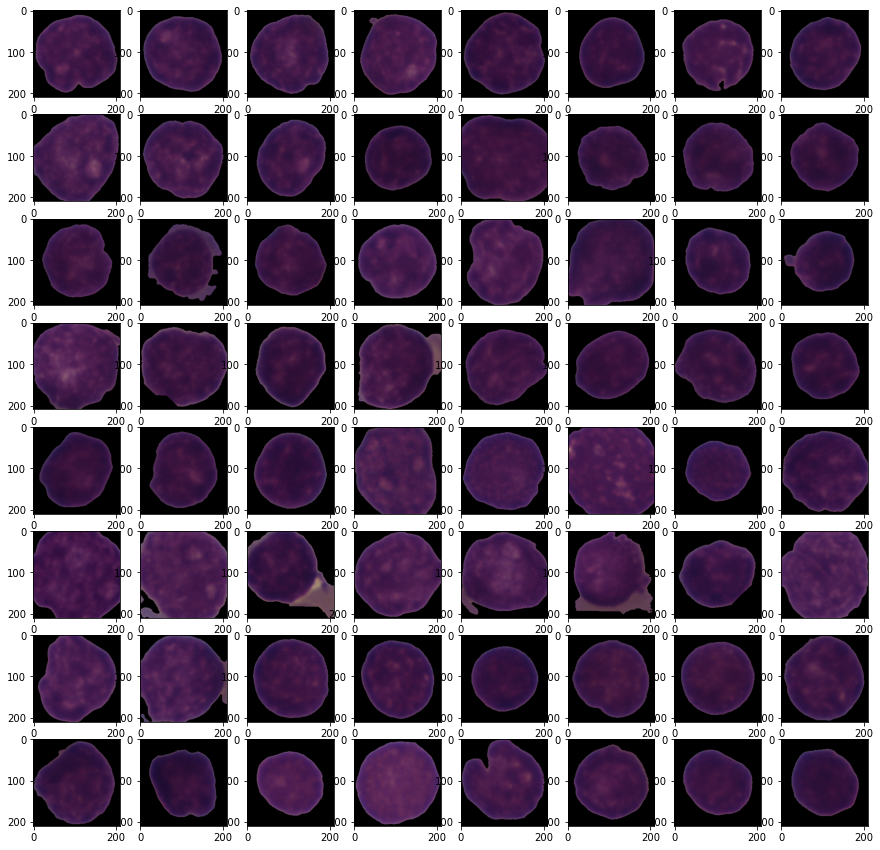

In [11]:
num = 8 # row n col
Plot_images(train_hem_batch, num)

# Augmentation pipeline

In [14]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)
seq = iaa.Sequential([
    # apply the following augmenters to most images
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.2), # vertically flip 20% of all images
        # crop images by -5% to 10% of their height/width
         iaa.Crop(percent=(0, 0.1)), # random crops
    
        sometimes(iaa.CropAndPad(
            pad_mode=ia.ALL,          
            percent=(-0.05, 0.1),
            pad_cval=(0, 255)
        )),
    
      sometimes(iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, # translate by -20 to +20 percent (per axis)
            rotate=(-45, 45), # rotate by -45 to +45 degrees

        )),
],
random_order=True
)

# Augment and save

In [15]:
def AugmentNsave_images(seq, batch, list_data, path, n):
    '''Augment'''
    images_aug = seq(images=batch)
    print(type(images_aug), images_aug.shape, images_aug.dtype, np.max(images_aug), np.min(images_aug), images_aug[0].shape, images_aug[0].dtype, np.max(images_aug[0]), np.min(images_aug[0]))
    '''Save'''
    for x in range(len(list_data)):
        #print(path)
        new_path = path + '/' + str(n) + 'Aug_' + list_data[x]
        print(new_path)
        imsave(new_path ,images_aug[x])

# 5x or 10x Aug

In [16]:
'''Each time augmented results are different'''
times2augment = 10
path = 'F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all'
for x in range(times2augment):
    AugmentNsave_images(seq,train_all_batch, train_all_list, path, x+1)
    


<class 'numpy.ndarray'> (33, 210, 210, 3) uint8 251 0 (210, 210, 3) uint8 147 0
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/1Aug_UID_11_12_2_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/1Aug_UID_11_37_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/1Aug_UID_15_15_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/1Aug_UID_16_28_2_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/1Aug_UID_17_28_3_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/1Aug_UID_20_8_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/1Aug_UID_21_38_5_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/1Aug_UID_23_21_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/1Aug_UID_25_5_3_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/1Aug_UID_25_9_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/1Aug_UID_26_11_2_all.bmp

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/4Aug_UID_11_37_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/4Aug_UID_15_15_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/4Aug_UID_16_28_2_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/4Aug_UID_17_28_3_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/4Aug_UID_20_8_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/4Aug_UID_21_38_5_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/4Aug_UID_23_21_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/4Aug_UID_25_5_3_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/4Aug_UID_25_9_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/4Aug_UID_26_11_2_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/4Aug_UID_27_8_3_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/4Aug_UID_2_5_4_all.bm

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/7Aug_UID_78_32_1_all.bmp
<class 'numpy.ndarray'> (33, 210, 210, 3) uint8 253 0 (210, 210, 3) uint8 147 0
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/8Aug_UID_11_12_2_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/8Aug_UID_11_37_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/8Aug_UID_15_15_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/8Aug_UID_16_28_2_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/8Aug_UID_17_28_3_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/8Aug_UID_20_8_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/8Aug_UID_21_38_5_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/8Aug_UID_23_21_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/8Aug_UID_25_5_3_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/8Aug_UID_25_9_1_all.bmp

C:\Users\NSU\AppData\Local\Temp/ipykernel_10028/2043344875.py:10: UserWarning: F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/9Aug_UID_4_1_3_all.bmp is a low contrast image
  imsave(new_path ,images_aug[x])
